# Analysis of Red Portuguese "Vinho Verde" Wines

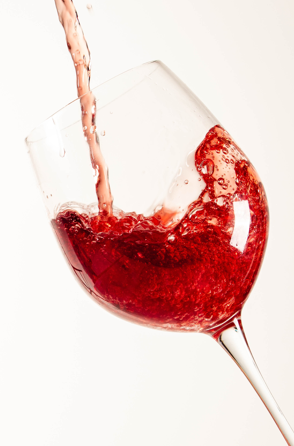

<center>Photo by Max Tutak on unsplash</center>

# Introduction

Red wine is an alcoholic beverage made by fermenting the juice of dark-skinned grapes. Alcohol occurs when yeast converts the sugar in grapes into ethanol. The alcohol content in red wine usually ranges from 12% to 15%. In this report, I analyzed nearly 1,600 data points related to red Portuguese "Vinho Verde" wines. Each data point consists of 12 features. Each feature, except "quality," is an objective measurement. The quality scores -- between 3 and 8 -- were given by human testers. It is not clear what were the exact criteria for each score. The goals of this analysis are listed below.

# Goals

1. Determine if any set of features would more likely result in a human tester giving the wine a score of 7 or 8. 
2. Determine which combination of features would determine the alcohol content of the wine. 

# Technical Requirements

1. Perform exploratory data analysis.
2. Do hypothesis testing.
3. Apply machine learning models.
4. Provide clear explanations. 
5. Provide conclusions and suggestions about how the analysis can be improved.

# Standards

Below is a summary of the standards I followed to create this report. 

>* **Standard 1:** Since one of my goals was to determine what makes wine, "good," I concentrated on wines that received a quality score of 7 or 8.
>* **Standard 2:** For correlation between features, my threshold was 0.8 or higher to indicate a correlation.

# Biases

I am unaware of any biases in myself or with the tools or data that I utilized. 

# Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import sqlite3
import math


from IPython.display import display
from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from scipy import stats

# Display Parameters

## Display Features

In [2]:
%matplotlib inline
pd.options.display.max_rows = 300000
pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 500

## Colors

In [3]:
color_1 = "bisque"
color_2 = "crimson"
color_3 = "orangered"
color_4 = "lightcoral"
color_5 = "royalblue"
color_6 = "pink"
color_7 = "indianred"
color_8 = "slategrey"
color_9 = "salmon"
color_10 = "beige"
color_11 = "coral"
color_13 = "grey"
color_14 = "tan"
color_15 = "wheat"
color_16 = "tomato"

## Figure Parameters

In [4]:
size = 20

params = {
    "font.family": "Times New Roman",
    "font.size": size,
    "axes.labelsize": size,
    "xtick.labelsize": size * 0.75,
    "ytick.labelsize": size * 0.75,
    "figure.titlesize": size * 1.5,
    "axes.titlesize": size * 1.5,
    "axes.titlepad": size,
    "axes.labelpad": size - 10,
    "lines.linewidth": 2,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.spines.left": False,
    "axes.spines.bottom": False,
    "legend.fontsize": size,
}

# Load and Display Raw Data

In [5]:
redwine = pd.read_csv(
    "C:\\Users\\Space\\Documents\\py\\Projects\\TuringCollege\\RedWine\\DataSets\\winequality-red.csv",
    index_col=False,
)

In [6]:
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Dataset

The dataset I used in this report is the Red Wine Quality dataset from Kaggle.

## Datasets Based on Quality

I separated the dataset into 6 smaller tables based on the quality score column. I utilized each table later in the analysis.

In [7]:
three = redwine[redwine["quality"] == 3]

In [8]:
four = redwine[redwine["quality"] == 4]

In [9]:
five = redwine[redwine["quality"] == 5]

In [10]:
six = redwine[redwine["quality"] == 6]

In [11]:
seven = redwine[redwine["quality"] == 7]

In [12]:
eight = redwine[redwine["quality"] == 8]

# Exploratory Data Analysis

General information about this dataset is given below.

## Dimensions

Below are the number of rows and columns in the dataset.

In [13]:
redwine.shape

(1599, 12)

## Data Types

Here is information about the data type of each column. 

In [14]:
redwine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Descriptive Statistics

Below is general statistical information about this data.

In [15]:
redwine.describe(include="all").applymap("{:,.2f}".format)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,"1,599.00","1,599.00","1,599.00","1,599.00","1,599.00","1,599.00","1,599.00","1,599.00","1,599.00","1,599.00","1,599.00","1,599.00"
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


### Section Summary
> * This dataset is comprised of 1,599 rows and 12 columns.
> * The data type of each of the columns except the 'quality' column is float. 
> * The data type of the 'quality' column is integer. 
> * The data type of the quality column is an integer.
> * The standard deviation of the data in every column is small. The exceptions are the 'free sulfur dioxide' and the 'total sulfur dioxide' columns. The range of values in these two columns is much greater than the others. This is reflected in the standard deviation for each column.

## Quality

In this section, you will find the number of wines in each quality category.

In [16]:
quality_counts = redwine["quality"].value_counts()
quality_counts = quality_counts.to_frame()
quality_counts.index.names = ["Quality"]
quality_counts.rename(columns={"quality": "Count"}, inplace=True)
quality_counts = quality_counts.reset_index()

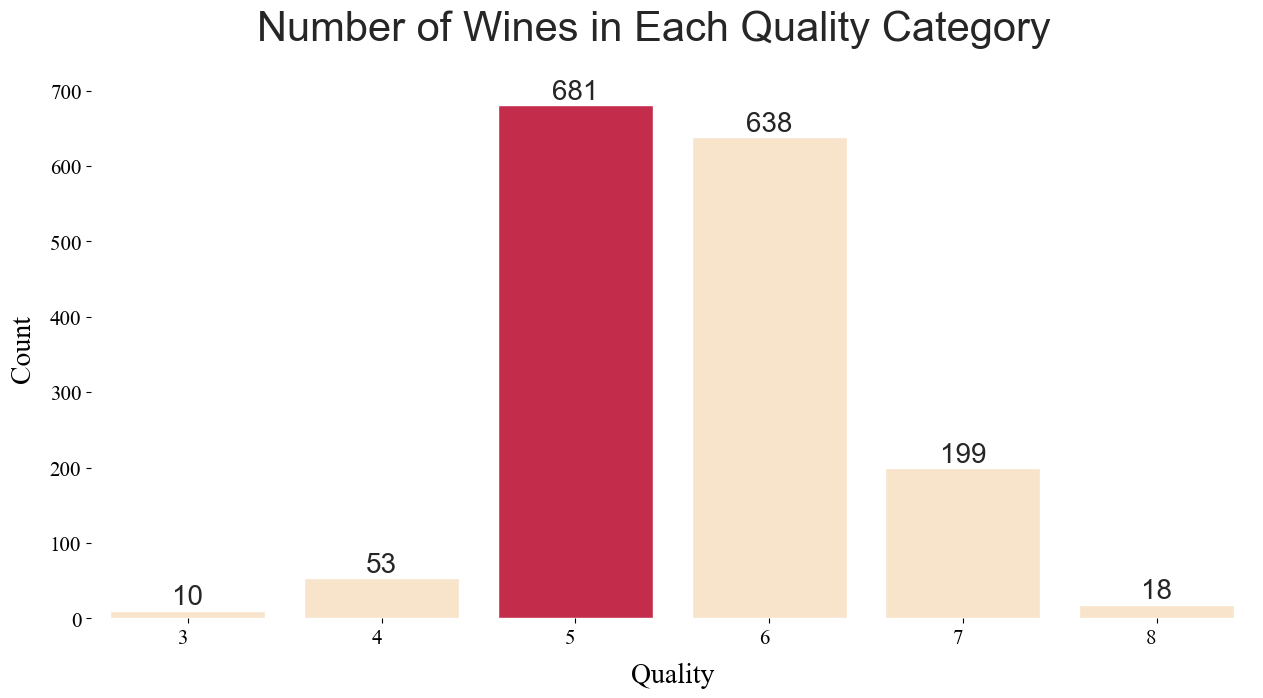

In [17]:
plt.rcParams.update(params)

fig, axes = plt.subplots(1, 1, figsize=(15, 7))
sns.set(style="white")

chart = sns.barplot(
    ax=axes,
    x="Quality",
    y="Count",
    data=quality_counts,
    errorbar=None,
    palette=[color_1 if x != 7 else color_2 for x in quality_counts["Quality"]],
)

chart.bar_label(chart.containers[0], size=size)

plt.xlabel("Quality")
plt.ylabel("Count")
plt.xticks()
plt.yticks()

chart.set_xticklabels(chart.get_xticklabels(), horizontalalignment="right")
plt.suptitle("Number of Wines in Each Quality Category")

plt.show()

### Section Summary
> * Of the 1599 wines in the dataset, only 18 received a quality score of 8. Nearly 200 received a 7.
> * Over 75% of the wines received a mid-range score of 5 or 6.
> * The focus of this report is on wines that received 7 or 8 in the quality column.

## Hypothesis Test: Mean Free Sulfur Dioxide Values and Quality

**Null**: There is no significant difference between the mean free sulfur dioxide values of Quality 3 wines and the mean free sulfur dioxide values of Quality 8 wines. <BR>
**Alternative**: The mean of free sulfur dioxide values of Quality 3 wines is significantly different than the mean of free sulfur dioxide values of Quality 8 wines.

In [19]:
def two_sample_t_test(sample1, sample2, variance):
    """
    Determines if the means of two samples are significanlty different.
    """

    if variance is False:
        print("The variance of the samples are different.")
    else:
        print("The variance of the samples are the same.")

    result = stats.ttest_ind(sample1, sample2, equal_var=variance)

    if result.pvalue < 0.05:
        print("Null hypothesis is rejected.")
    else:
        print("Failed to reject the null hypothesis.")

In [21]:
three_sample = three
eight_sample = eight

In [22]:
var_three_sample = np.var(three_sample["free sulfur dioxide"])
var_eight_sample = np.var(eight_sample["free sulfur dioxide"])

if var_three_sample == var_eight_sample:
    variance = True
else:
    variance = False

In [23]:
two_sample_t_test(
    three_sample["free sulfur dioxide"], eight_sample["free sulfur dioxide"], variance
)

The variance of the samples are different.
Failed to reject the null hypothesis.


### Section Summary
> * The null hypothesis was NOT rejected, indicating that there is not a statistically significant difference between the mean free sulfur dioxide content in wines with quality 3 as compared to the same measure in wines of quality 8. 

## Relationship of Free Sulfur Dioxide Content and Wine Quality 

In this section, you will see how wines of different qualities have different free sulfur dioxide values. 

In [55]:
mean_free_sulfurdioxide = redwine.groupby('quality')['free sulfur dioxide'].mean()
mean_free_sulfurdioxide = mean_free_sulfurdioxide.to_frame()

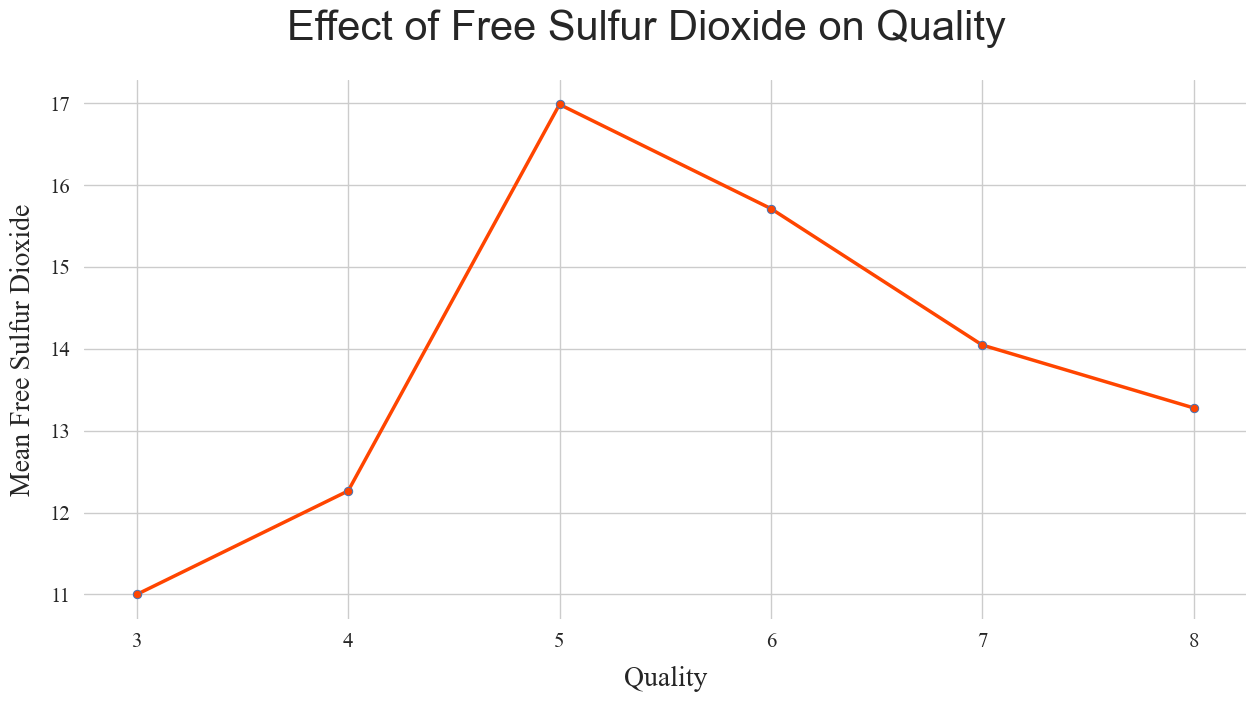

In [65]:
plt.rcParams.update(params)

fig, ax = plt.subplots(figsize=(15, 7))
sns.set(style="whitegrid")

ax = sns.lineplot(
    x="quality",
    y="free sulfur dioxide",
    data=mean_free_sulfurdioxide,
    marker="o",
    markeredgecolor="b",
    color=color_3,
    linewidth=2.5,
    markers=True,
)


plt.xlabel("Quality")
plt.ylabel("Mean Free Sulfur Dioxide")
plt.xticks()
plt.yticks()

plt.suptitle("Effect of Free Sulfur Dioxide on Quality")

plt.show()

### Section Summary
> * Wines of quality 7 and 8 have mean free sulfur dioxide values in the range 13 - 14.
> * Wines of lower qualities have mean free sulfur dioxide values either lower or higher than the range of 13 - 14.
> * The lowest quality wines have the lowest free sulfur dioxide values.

## Hypothesis Test: Mean Fixed Acidity and Quality

**Null**: There is no significant difference between the mean fixed acidity of wines with quality 3 and the mean fixed acidity of all the other wines in the dataset. <BR>
**Alternative**: The mean fixed acidity of wines with quality 3 is significantly different than the mean fixed acidity of all the other wines in the dataset.

In [18]:
def two_tailed_z_test(sample_mean, sample_size, pop_mean, pop_std, critical_value):
    """
    Determines if the mean of a sample is significanlty different than the mean of a population.
    """

    result = (sample_mean - pop_mean) / (pop_std / math.sqrt(sample_size))
    if result < critical_value:
        print("Failed to reject the null hypothesis.")
    else:
        print("Null hypothesis is rejected.")

In [20]:
l = [3]

two_tailed_z_test(
    np.average(three["fixed acidity"]),
    three.shape[0],
    redwine["fixed acidity"].agg([np.mean]).item(),
    redwine[~redwine.quality.isin(l)]["fixed acidity"].agg([np.std]).item(),
    1.960,
)

Failed to reject the null hypothesis.


### Section Summary
> * The null hypothesis was NOT rejected, indicating that there is not a statistically significant difference between the mean fixed acidity in wines with quality 3 and the same measure in all the other wines in the dataset. 

## Relationship of Fixed Acidity and Wine Quality 

In this section, you will see how wines of different qualities have different fixed acidity values. 

In [69]:
mean_fixedacidity = redwine.groupby('quality')['fixed acidity'].mean()
mean_fixedacidity = mean_fixedacidity.to_frame()

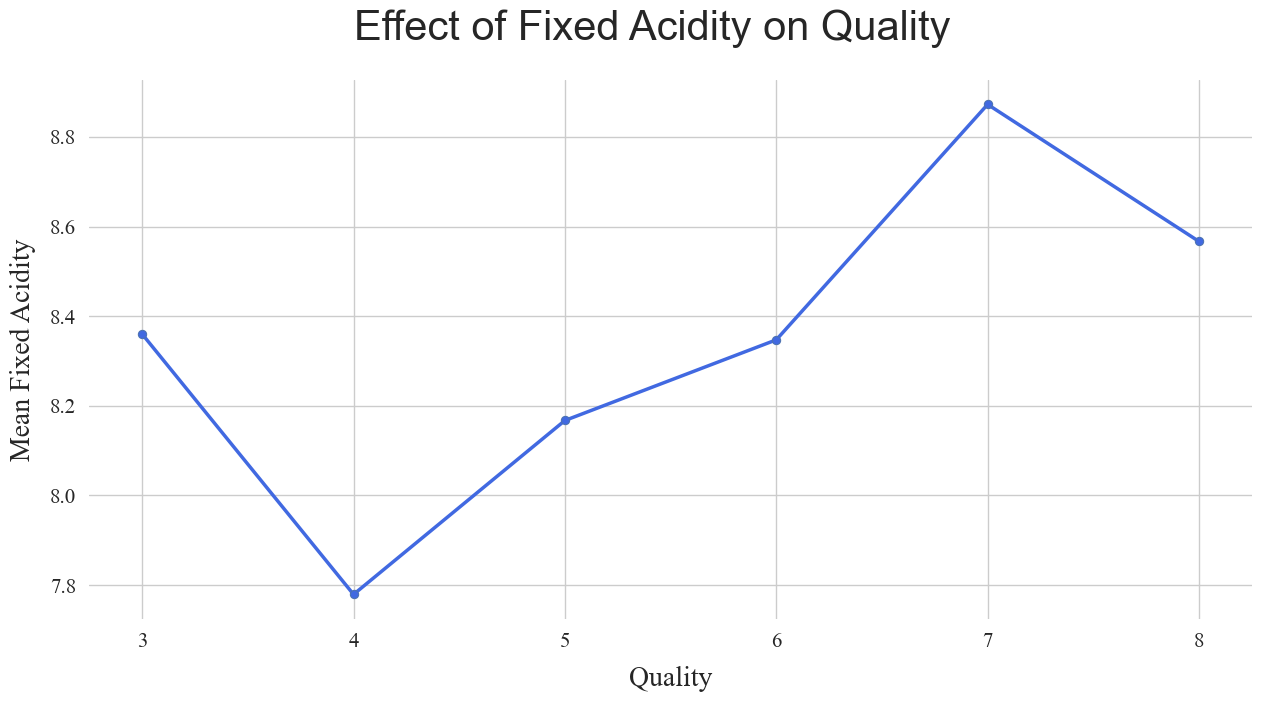

In [70]:
plt.rcParams.update(params)

fig, ax = plt.subplots(figsize=(15, 7))
sns.set(style="whitegrid")

ax = sns.lineplot(
    x="quality",
    y="fixed acidity",
    data=mean_fixedacidity,
    marker="o",
    markeredgecolor="b",
    color=color_5,
    linewidth=2.5,
    markers=True,
)


plt.xlabel("Quality")
plt.ylabel("Mean Fixed Acidity")
plt.xticks()
plt.yticks()

plt.suptitle("Effect of Fixed Acidity on Quality")

plt.show()

### Section Summary
> * Volatile acidity values are lowest for lower-quality wines.
> * Generally, the quality of wine increases as the fixed acidity values increase.
> * Fixed acidity decreases from quality 7 to quality 8.

# Correlations

In this section, I will explore issues related multi-collinearity. 

## Function Used in this Section

In [27]:
def create_heatmap(data, title):
    """
    Creates a Seaborn heatmap.
    """

    plt.rcParams.update(params)
    corr = data.corr()

    mask = np.triu(np.ones_like(corr, dtype=bool))

    f, ax = plt.subplots(figsize=(16, 16))

    cmap = sns.diverging_palette(230, 10, as_cmap=True)
    heatmap = sns.heatmap(
        corr,
        mask=mask,
        cmap=cmap,
        vmax=1,
        vmin=-1,
        center=0,
        square=True,
        linewidths=0.5,
        cbar_kws={"shrink": 0.5},
        annot=True,
    )

    heatmap.set_title(
        title,
        fontdict={"fontsize": size * 1.5},
        pad=12,
    )
    plt.xlabel("")
    plt.ylabel("")

### Correlation of Features in Wines with Quality Score 3

Here, you will see which features are correlated with one another in wines with a quality score of 3.

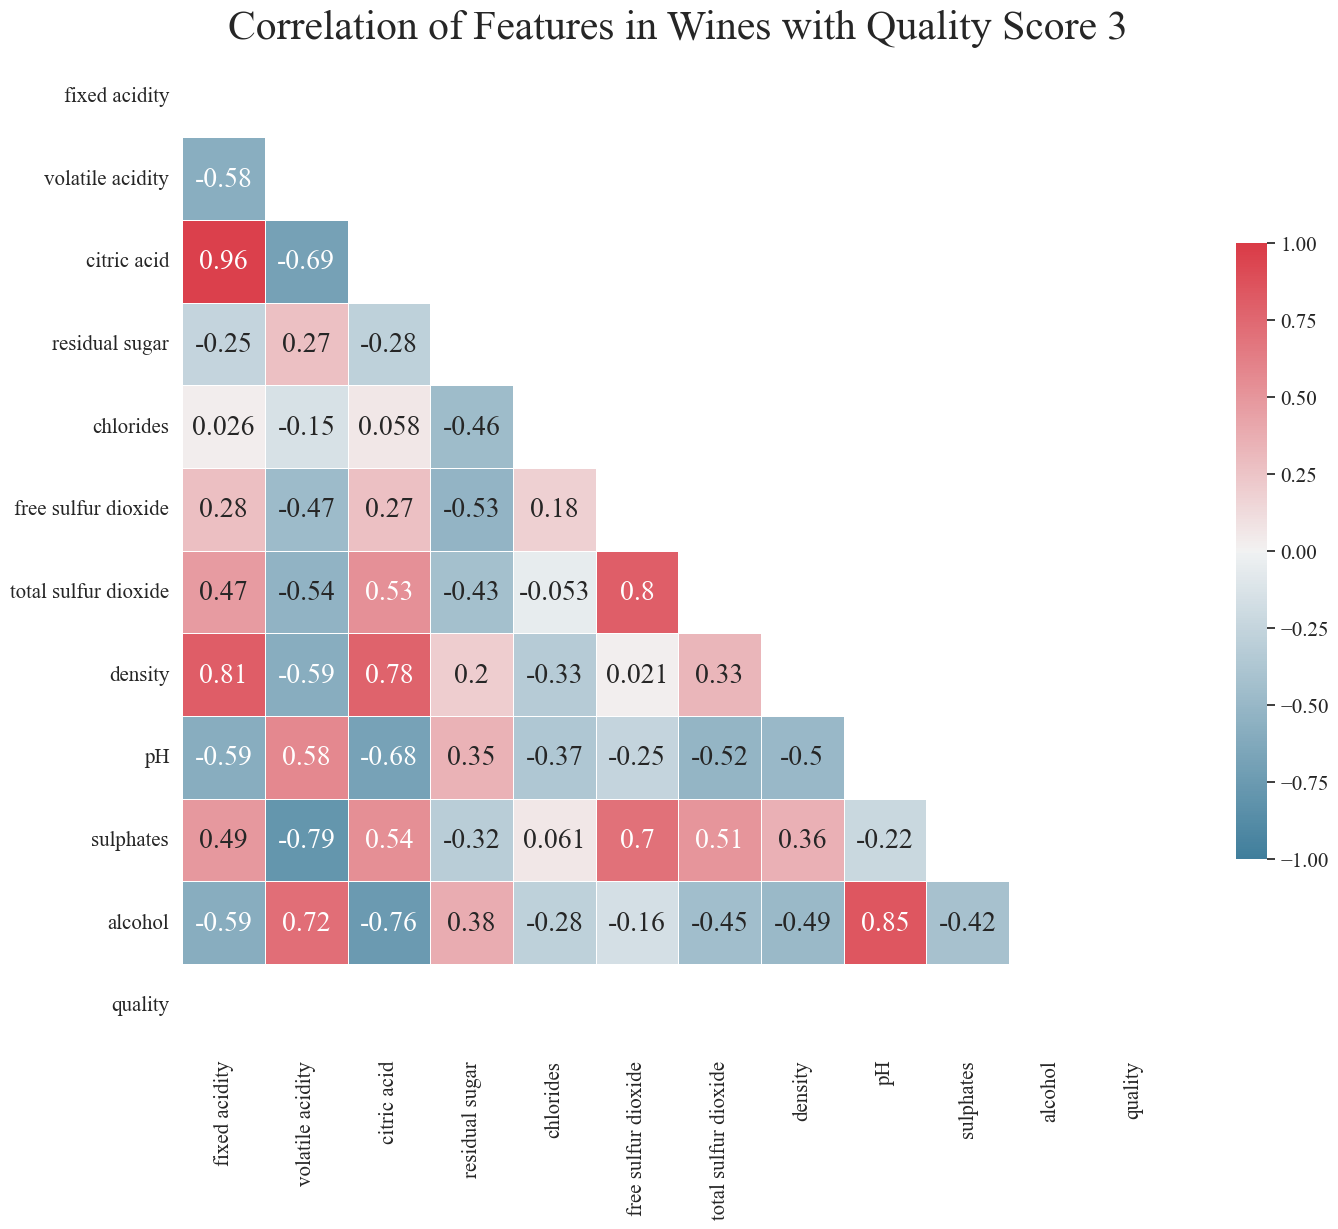

In [28]:
data = three
title = "Correlation of Features in Wines with Quality Score 3"
create_heatmap(data, title)

### Section Summary
> * I set 0.8 as the threshold to indicate correlation. 
> * Correlation between features, may cause multi-collinearity issues and interfere with how the machine learning models work. In wines with quality score of 3, the following features are correlated. 
        1.'fixed acidity' and 'density'
        2.'fixed acidity' and 'citric acid'
        3.'free sulfur dioxide' and 'total sulfur dioxide'
        4.'pH' and 'alcohol'

### Correlation of Features in Wines with Quality Score 4

Here, you will see which features are correlated with one another in wines with a quality score of 4.

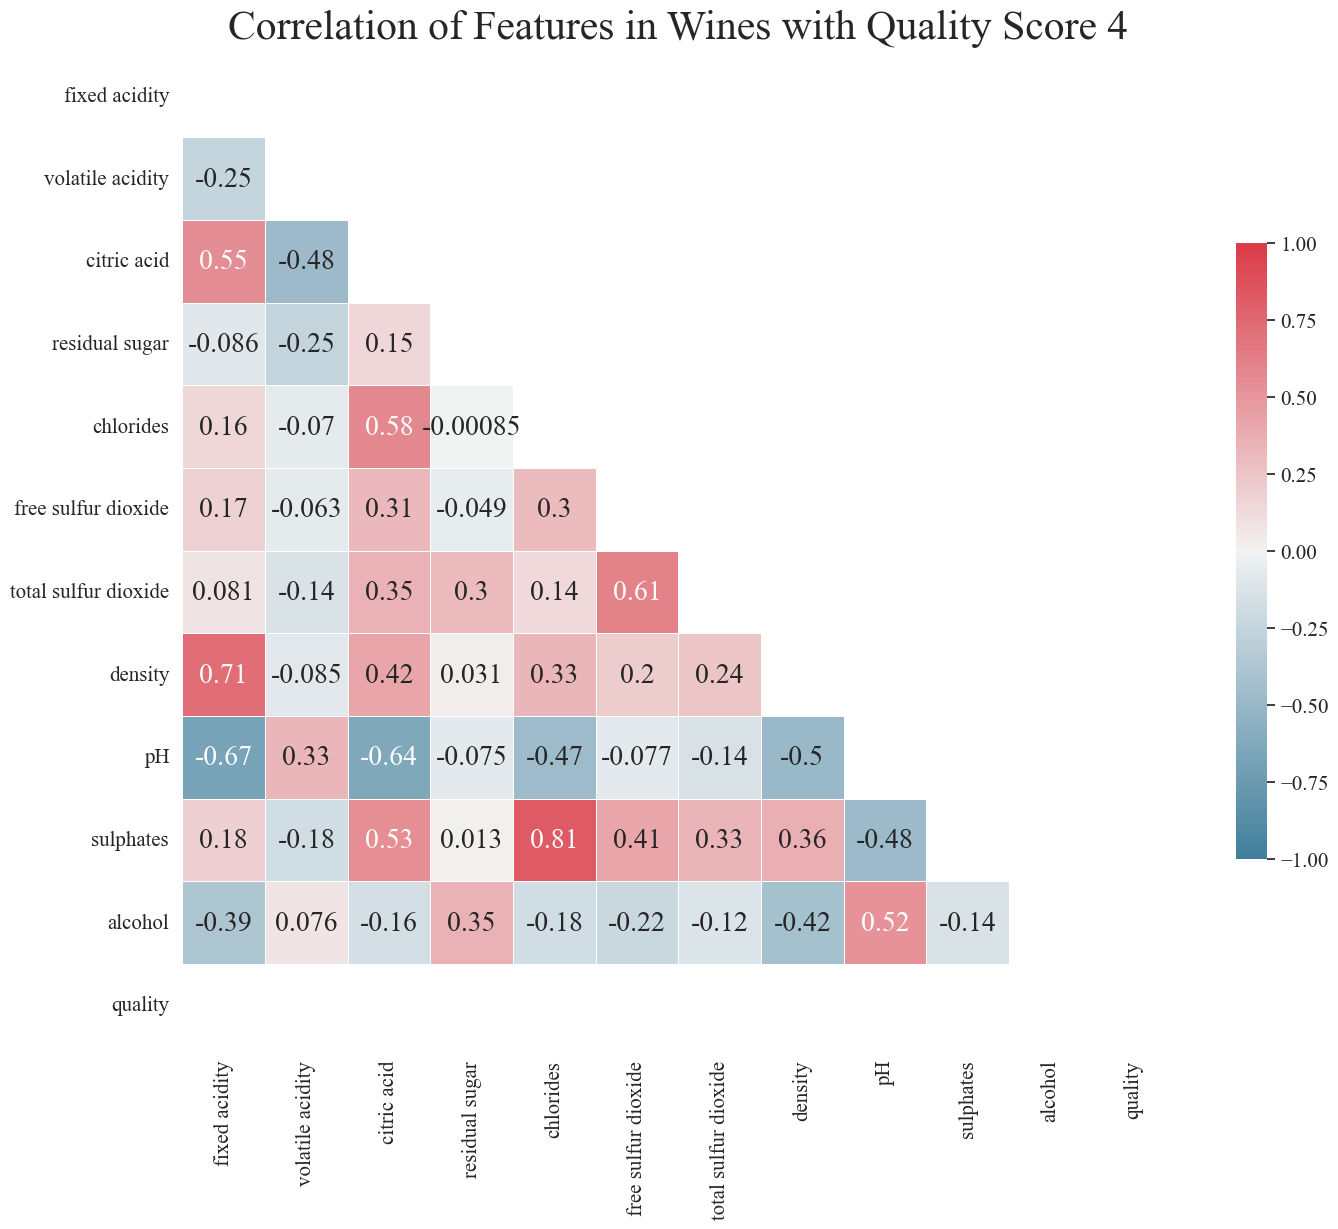

In [29]:
data = four
title = "Correlation of Features in Wines with Quality Score 4"
create_heatmap(data, title)

### Section Summary
> * I set 0.8 as the threshold to indicate correlation. 
> * Correlation between features, may cause multi-collinearity issues in machine learning models. In wines with a quality score of 4, the following features are correlated: 'chlorides' and 'sulphates.'

### Correlation of Features in Wines with Quality Score 5

Here, you will see which features are correlated with one another in wines with a quality score of 5.

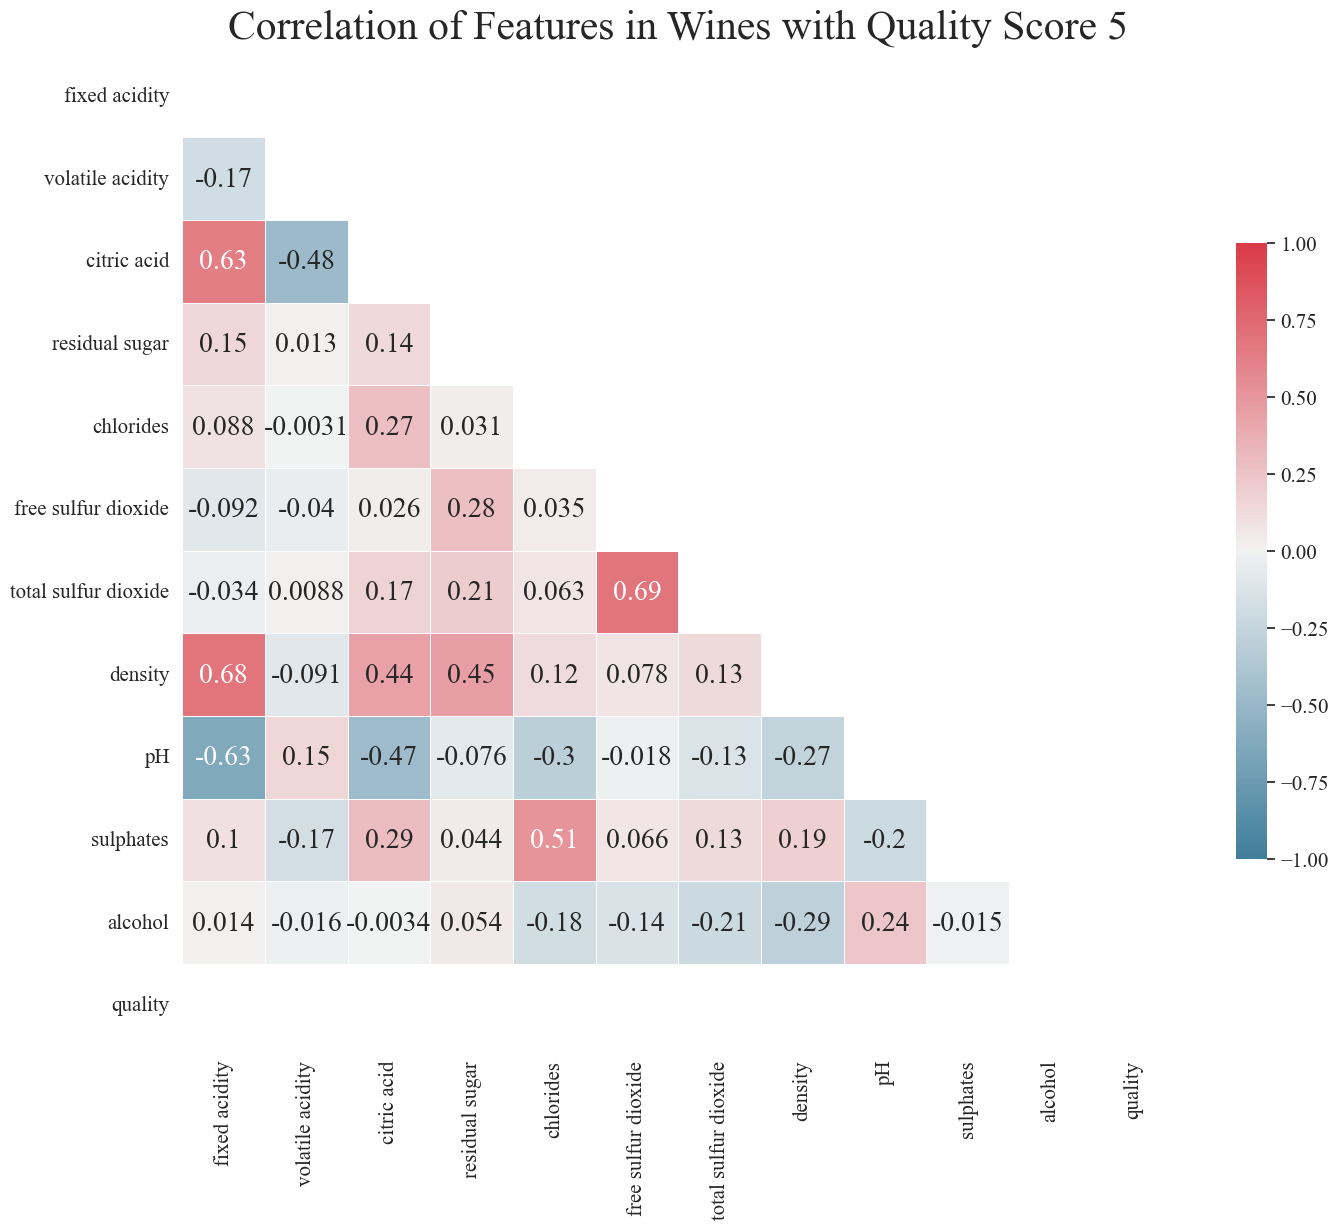

In [30]:
data = five
title = "Correlation of Features in Wines with Quality Score 5"
create_heatmap(data, title)

### Section Summary
> * I set 0.8 as the threshold to indicate correlation.
> * There seems to be no correlation between any of the features when looking at wines with a quality score of 5. 

### Correlation of Features in Wines with Quality Score 6

Here, you will see which features are correlated with one another in wines with a quality score of 6.

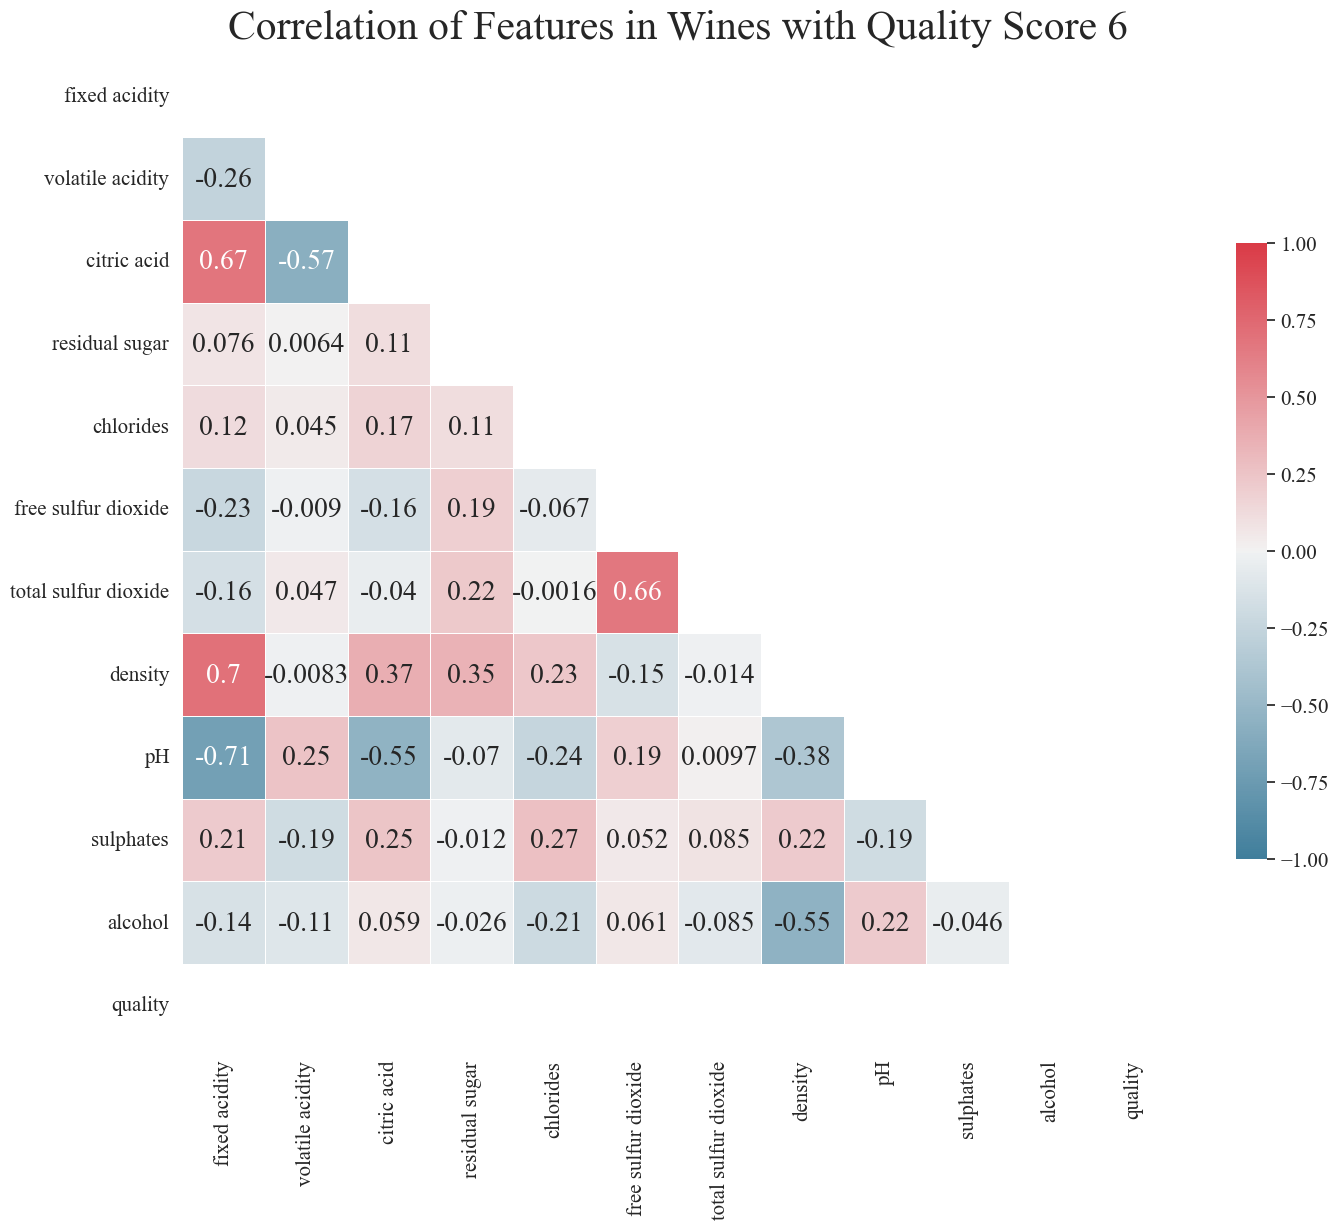

In [31]:
data = six
title = "Correlation of Features in Wines with Quality Score 6"
create_heatmap(data, title)

### Section Summary
> * I set 0.8 as the threshold to indicate correlation.
> * There seems to be no correlation between any of the features when looking at wines with a quality score of 6. 

### Correlation of Features in Wines with Quality Score 7

Here, you will see which features are correlated with one another in wines with a quality score of 7.

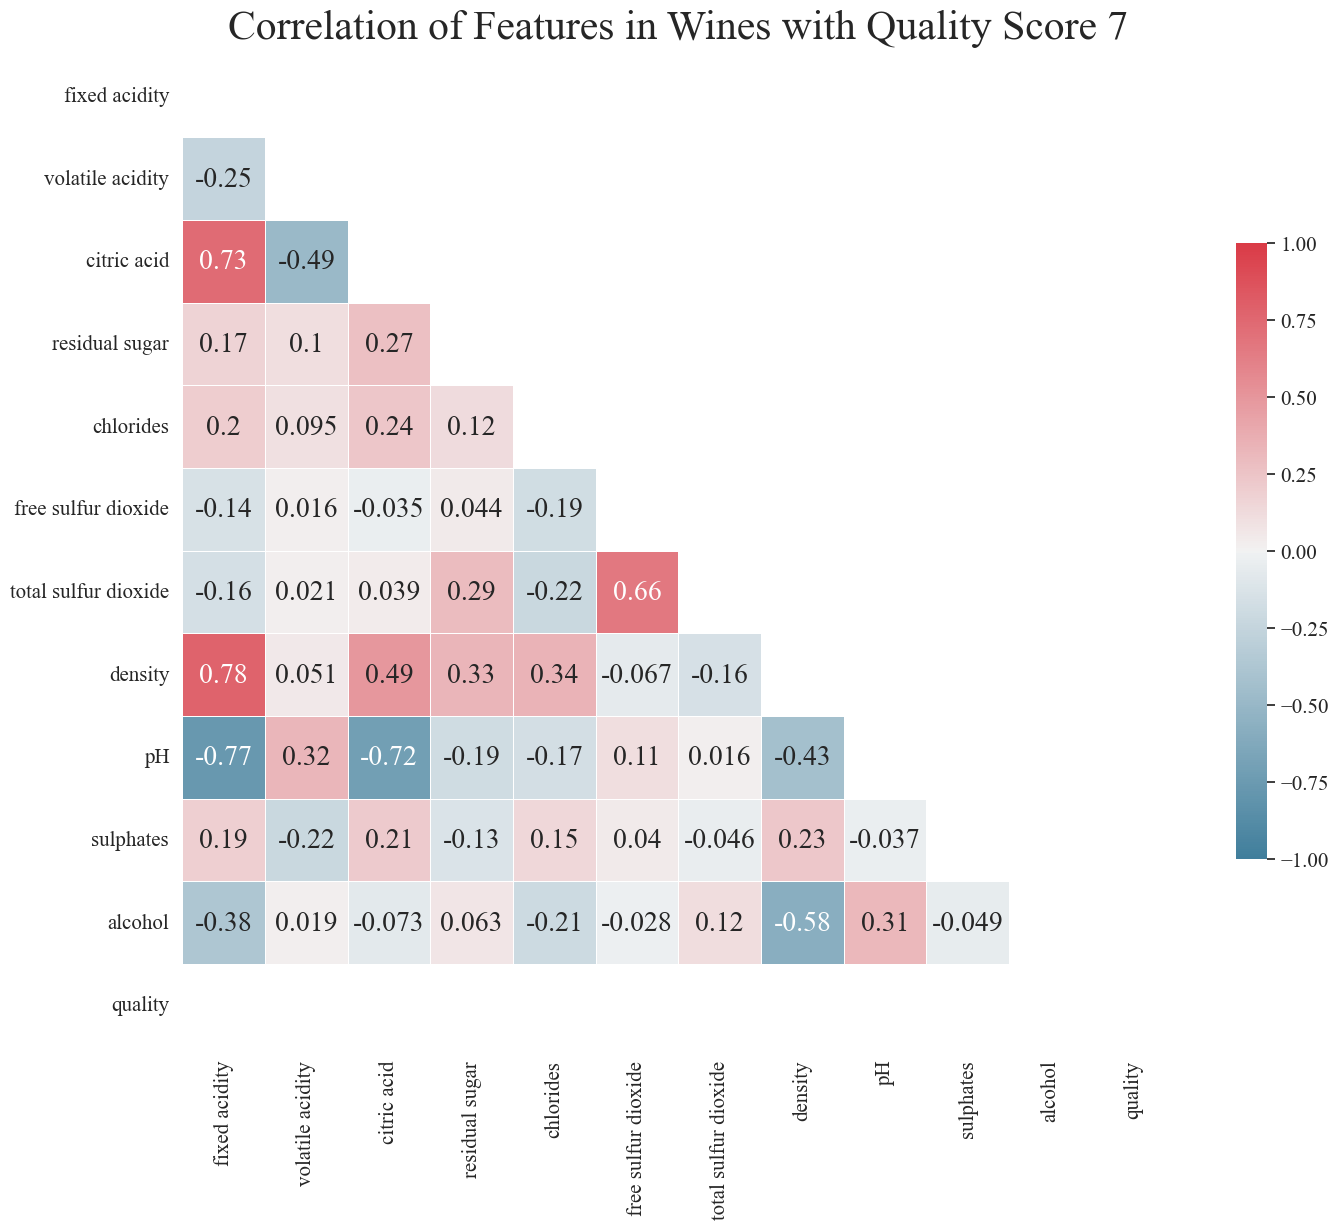

In [32]:
data = seven
title = "Correlation of Features in Wines with Quality Score 7"
create_heatmap(data, title)

### Section Summary
> * I set 0.8 as the threshold to indicate correlation.
> * There seems to be no correlation between any of the features when looking at wines with a quality score of 7. 

### Correlation of Features in Wines with Quality Score 8

Here, you will see which features are correlated with one another in wines with a quality score of 8.

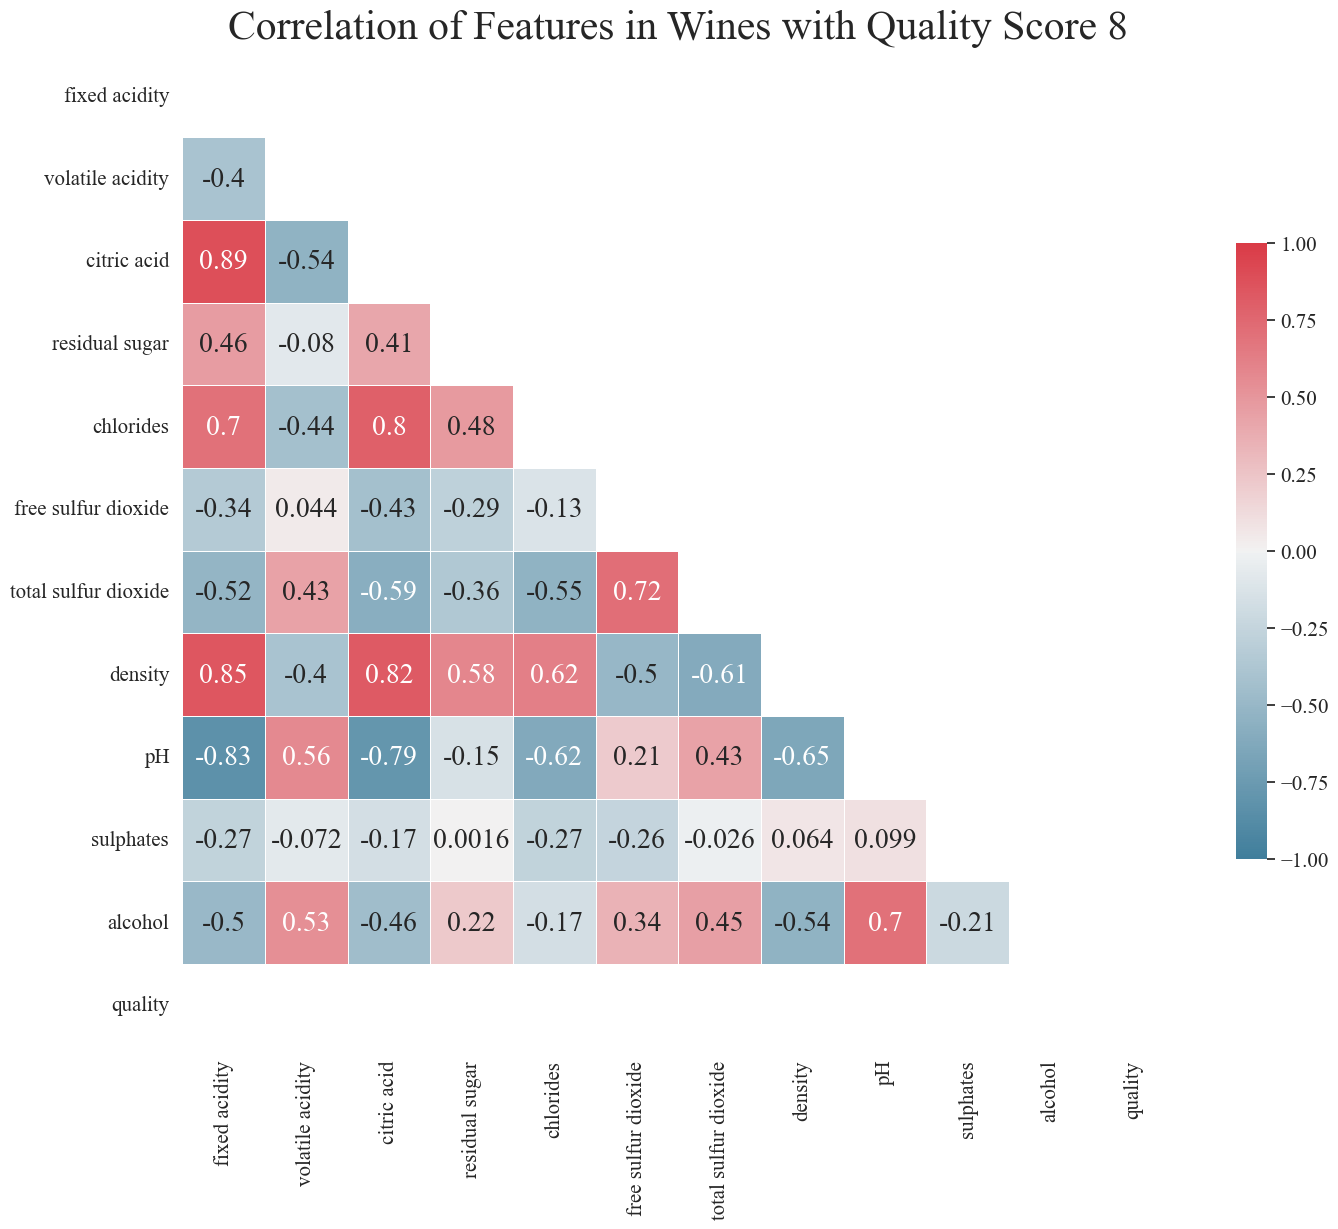

In [33]:
data = eight
title = "Correlation of Features in Wines with Quality Score 8"
create_heatmap(data, title)

## Multi-Collinearity of Features in Wines of Quality 8

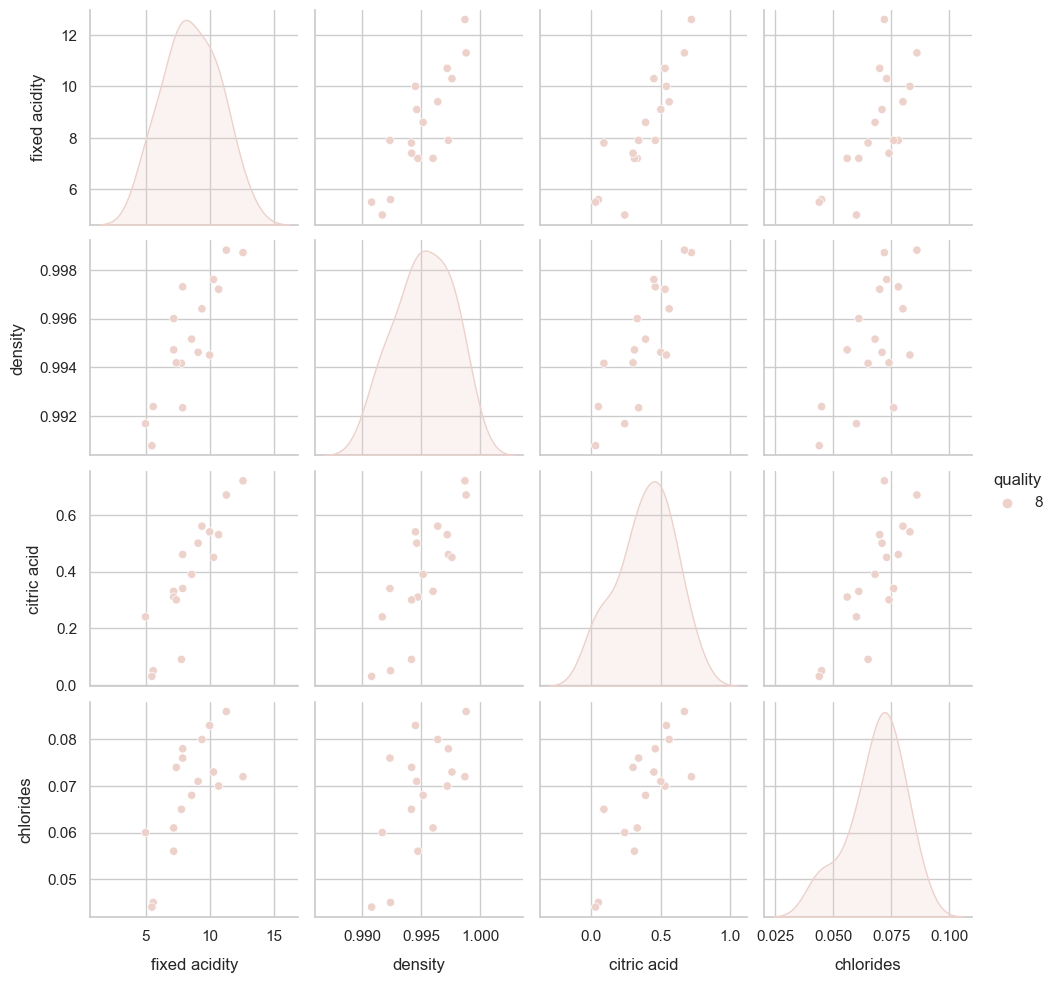

In [58]:
eight_sub = eight[['fixed acidity','density','citric acid', 'chlorides', 'quality']]
sns.pairplot(eight_sub, hue='quality')
plt.show()

### Section Summary
> * I set 0.8 as the threshold to indicate correlation. 
> * Correlation between features, if not handled correctly, cause issues with multi-collinearity in the machine learning models that I utilized later in this analysis. In wines with of quality score of 8, the following features are correlated. 
        1.'fixed acidity' and 'density'
        2.'fixed acidity' and 'citric acid'
        3.'citric acid' and 'density'
        4.'citric acid' and 'chlorides'

# Creating Two Datasets Based on Wine Quality Score

As I mentioned earlier in this report, the goal of this analysis is to determine what makes wine, "good." To this end, I divided the wines in the dataset into two groups. Good wines are those with quality scores of 7 and 8. Bad wines are those with quality scores of 3, 4, 5, and 6.

In [34]:
redwine["quality"] = redwine["quality"].replace([7, 8], 1)
redwine["quality"] = redwine["quality"].replace([3, 4, 5, 6], 0)

# Predicting Quality Values

In this section, I looked at how well my model can predict quality based on the other features. I worked with the collinear features that I identified above and determined which in a pair is better correlated with wine quality. Then, I used a multivariant model that utilized the best features to predict quality values.

## Functions Used in This Section

In [35]:
def scale_data(columns):
    '''
    Scales all data columns.
    '''

    scaler = MinMaxScaler()

    scaled_data = scaler.fit_transform(redwine)
    scaled_data = pd.DataFrame(
        scaled_data,
        columns=columns,
    )

    return scaled_data

In [36]:
def create_varialbles(data, indepdent_varialble, dependent_variable):
    """
    Assigns independent and dependent variables.
    """

    X = data[indepdent_varialble]
    y = data[dependent_variable]

    return X, y

In [37]:
def random_oversampler(X, y):
    """
    Creates balanced numbers of datapoints.
    """

    oversample = RandomOverSampler(sampling_strategy="minority")
    oversample = RandomOverSampler(sampling_strategy="auto")
    steps = [("over", RandomOverSampler()), ("model", LogisticRegression())]
    pipeline = Pipeline(steps=steps)
    X, y = oversample.fit_resample(X, y)

    return X, y

In [38]:
def logistic_regression_model(X, y):
    """
    Creates logistic regression model.
    """

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, shuffle=True, test_size=0.2, random_state=0
    )
    log_model = LogisticRegression(solver="liblinear", random_state=None)
    log_model.fit(X_train, y_train)
    y_predict = log_model.predict(X_test)

    return log_model, X_test, y_test, y_predict

In [40]:
def print_classification_report(y_test, y_predict):
    """
    Prints the classification report.
    """

    print(classification_report(y_test, y_predict))

In [41]:
def display_roc_curve(log_model, X_test, y_test, y_predict):
    """
    Displays the Receiver Operating Characteristic (ROC) Curve.
    """
    
    plt.rcParams.update(params)
    sns.despine(left=True, bottom=True)

    logit_roc_auc = roc_auc_score(y_test, y_predict)
    fpr, tpr, thresholds = roc_curve(y_test, log_model.predict_proba(X_test)[:, 1])

    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc)
    plt.plot([0, 1], [0, 1], "r--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic Curve")
    plt.legend(loc="lower right")

    plt.show();

## Data Scaling

Here, I scaled the column values to help compare the values of each column on an equal footing.

In [42]:
columns = [
    "fixed acidity",
    "volatile acidity",
    "citric acid",
    "residual sugar",
    "chlorides",
    "free sulfur dioxide",
    "total sulfur dioxide",
    "density",
    "pH",
    "sulphates",
    "alcohol",
    "quality",
]

scaled_redwine_logistic = scale_data(columns)

In [43]:
scaled_redwine_logistic.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.0
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.0
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.0
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.0
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.0


## Logistic Regression Citric Acid and Quality

In this section, I attempted to determine how well citric acid values can determine the quality score.

In [44]:
data = scaled_redwine_logistic

indepdent_varialble = [
    "citric acid",
]

dependent_variable = "quality"

X, y = create_varialbles(data, indepdent_varialble, dependent_variable)
X, y = random_oversampler(X, y)
log_model, X_test, y_test, y_predict = logistic_regression_model(X, y)

In [45]:
print_classification_report(y_test, y_predict)

              precision    recall  f1-score   support

         0.0       0.75      0.62      0.68       287
         1.0       0.66      0.77      0.71       266

    accuracy                           0.70       553
   macro avg       0.70      0.70      0.70       553
weighted avg       0.70      0.70      0.69       553



## Logistic Regression Density and Quality

Here, I attempted to determine how well density values can determine the quality score.

In [46]:
data = scaled_redwine_logistic

indepdent_varialble = [
    "density",
]

dependent_variable = "quality"

X, y = create_varialbles(data, indepdent_varialble, dependent_variable)
X, y = random_oversampler(X, y)
log_model, X_test, y_test, y_predict = logistic_regression_model(X, y)

In [47]:
print_classification_report(y_test, y_predict)

              precision    recall  f1-score   support

         0.0       0.61      0.55      0.58       287
         1.0       0.56      0.62      0.59       266

    accuracy                           0.59       553
   macro avg       0.59      0.59      0.59       553
weighted avg       0.59      0.59      0.59       553



## Logistic Regression Fixed Acidity and Quality

Here, I attempted to determine how well fixed acidity values can determine the quality score.

In [48]:
data = scaled_redwine_logistic

indepdent_varialble = [
    "fixed acidity",
]

dependent_variable = "quality"

X, y = create_varialbles(data, indepdent_varialble, dependent_variable)
X, y = random_oversampler(X, y)
log_model, X_test, y_test, y_predict = logistic_regression_model(X, y)

In [49]:
print_classification_report(y_test, y_predict)

              precision    recall  f1-score   support

         0.0       0.57      0.59      0.58       287
         1.0       0.54      0.51      0.52       266

    accuracy                           0.55       553
   macro avg       0.55      0.55      0.55       553
weighted avg       0.55      0.55      0.55       553



## Logistic Regression Chlorides and Quality

Here, I attempted to determine how well chlorides values can determine the quality score.

In [50]:
data = scaled_redwine_logistic

indepdent_varialble = [
    "chlorides",
]

dependent_variable = "quality"

X, y = create_varialbles(data, indepdent_varialble, dependent_variable)
X, y = random_oversampler(X, y)
log_model, X_test, y_test, y_predict = logistic_regression_model(X, y)

In [51]:
print_classification_report(y_test, y_predict)

              precision    recall  f1-score   support

         0.0       0.58      0.33      0.42       287
         1.0       0.51      0.74      0.60       266

    accuracy                           0.53       553
   macro avg       0.54      0.53      0.51       553
weighted avg       0.54      0.53      0.51       553



## Logistic Regression Sulfates and Quality

Here, I attempted to determine how well sulfates values can determine the quality score.

In [52]:
data = scaled_redwine_logistic

indepdent_varialble = [
    "sulphates",
]

dependent_variable = "quality"

X, y = create_varialbles(data, indepdent_varialble, dependent_variable)
X, y = random_oversampler(X, y)
log_model, X_test, y_test, y_predict = logistic_regression_model(X, y)

In [53]:
print_classification_report(y_test, y_predict)

              precision    recall  f1-score   support

         0.0       0.71      0.71      0.71       287
         1.0       0.69      0.69      0.69       266

    accuracy                           0.70       553
   macro avg       0.70      0.70      0.70       553
weighted avg       0.70      0.70      0.70       553



## Logistic Regression Total Sulfur Dioxide and Quality

Here, I attempted to determine how well total sulfur dioxide values can determine the quality score.

In [54]:
data = scaled_redwine_logistic

indepdent_varialble = [
    "total sulfur dioxide",
]

dependent_variable = "quality"

X, y = create_varialbles(data, indepdent_varialble, dependent_variable)
X, y = random_oversampler(X, y)
log_model, X_test, y_test, y_predict = logistic_regression_model(X, y)

In [55]:
print_classification_report(y_test, y_predict)

              precision    recall  f1-score   support

         0.0       0.63      0.44      0.51       287
         1.0       0.54      0.72      0.62       266

    accuracy                           0.57       553
   macro avg       0.59      0.58      0.57       553
weighted avg       0.59      0.57      0.56       553



## Logistic Regression Free Sulfur Dioxide and Quality

Here, I attempted to determine how well free sulfur dioxide values can determine the quality score.

In [56]:
data = scaled_redwine_logistic

indepdent_varialble = [
    "free sulfur dioxide",
]

dependent_variable = "quality"

X, y = create_varialbles(data, indepdent_varialble, dependent_variable)
X, y = random_oversampler(X, y)
log_model, X_test, y_test, y_predict = logistic_regression_model(X, y)

In [57]:
print_classification_report(y_test, y_predict)

              precision    recall  f1-score   support

         0.0       0.58      0.41      0.48       287
         1.0       0.52      0.68      0.59       266

    accuracy                           0.54       553
   macro avg       0.55      0.54      0.53       553
weighted avg       0.55      0.54      0.53       553



## Logistic Regression Alcohol and Quality

Here, I attempted to determine how well alcohol values can determine the quality score.

In [58]:
data = scaled_redwine_logistic

indepdent_varialble = [
    "alcohol",
]

dependent_variable = "quality"

X, y = create_varialbles(data, indepdent_varialble, dependent_variable)
X, y = random_oversampler(X, y)
log_model, X_test, y_test, y_predict = logistic_regression_model(X, y)

In [59]:
print_classification_report(y_test, y_predict)

              precision    recall  f1-score   support

         0.0       0.78      0.72      0.75       287
         1.0       0.72      0.78      0.75       266

    accuracy                           0.75       553
   macro avg       0.75      0.75      0.75       553
weighted avg       0.75      0.75      0.75       553



## Logistic Regression pH and Quality

Here, I attempted to determine how well pH values can determine the quality score.

In [60]:
data = scaled_redwine_logistic

indepdent_varialble = [
    "pH",
]

dependent_variable = "quality"

X, y = create_varialbles(data, indepdent_varialble, dependent_variable)
X, y = random_oversampler(X, y)
log_model, X_test, y_test, y_predict = logistic_regression_model(X, y)

In [61]:
print_classification_report(y_test, y_predict)

              precision    recall  f1-score   support

         0.0       0.58      0.49      0.53       287
         1.0       0.53      0.61      0.57       266

    accuracy                           0.55       553
   macro avg       0.55      0.55      0.55       553
weighted avg       0.55      0.55      0.55       553



### Section Summary
> * Based on the accuracy scores from each logistic regression model test above, we can see the following regarding the ability of each of the collinear features to determine quality by themselves:
        1. citric acid: 0.69
        2. density: 0.59
        3. fixed acidity: 0.59
        4. chlorides: 0.53
        5. sulphates: 0.69
        6. total sulfur dioxide: 0.59
        7. free sulfur dioxide: 0.54
        8. alcohol: 0.76
        9. pH: 0.58 
> * It is clear that the features above have somewhat of an ability to predict the quality values individually.

# Multivariant Logistic Regression

In this section, I utilized the best features from the analysis above to create a model for predicting quality scores. I also used two features with no collinear relationship: volatile acidity and residual sugar.

In [62]:
data = scaled_redwine_logistic

indepdent_varialble = [
    "volatile acidity",
    "residual sugar",
    "citric acid",
    "density",
    "sulphates",
    "total sulfur dioxide",
    "alcohol",
]

dependent_variable = "quality"

X, y = create_varialbles(data, indepdent_varialble, dependent_variable)
X, y = random_oversampler(X, y)
log_model, X_test, y_test, y_predict = logistic_regression_model(X, y)

In [63]:
print_classification_report(y_test, y_predict)

              precision    recall  f1-score   support

         0.0       0.84      0.76      0.80       287
         1.0       0.77      0.85      0.81       266

    accuracy                           0.80       553
   macro avg       0.81      0.80      0.80       553
weighted avg       0.81      0.80      0.80       553



## The ROC Curve

Below is a ROC (Receiver Operating Characteristic) curve, which is a graph showing the performance of a classification model at all classification thresholds. 

<Figure size 640x480 with 0 Axes>

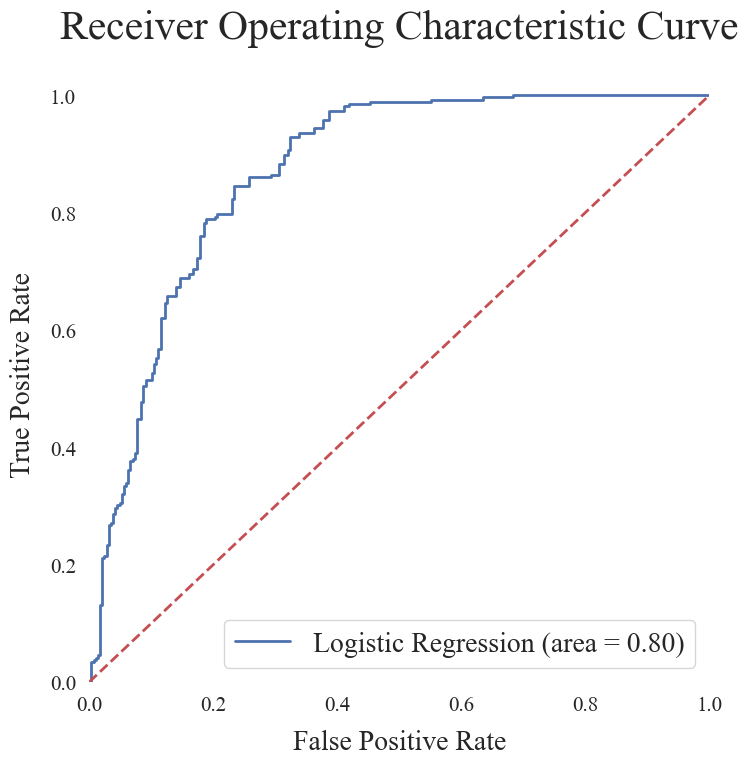

In [64]:
display_roc_curve(log_model, X_test, y_test, y_predict)

### Section Summary  
> * For each collinear pair of features, I chose the one in the pair with the highest accuracy score to determine the value in the quality column. Below are the features I used for the multivariant logistic regression model:
        1. citric acid
        2. density
        3. sulphates
        4. total sulfur dioxide
        5. alcohol
        6. volatile acidity (not collinear with any other feature)
        7. residual sugar (not collinear with any other feature)
> *  Inserting these features in the multivariant logistic regression model, I received an adequate accuracy score of 0.78. 
> *  The ROC curve plots the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The best possible prediction method would yield a point in the upper left corner or coordinate (0,1), representing no false negatives and no false positives. A random guess would give a point along a diagonal line from the bottom left to the top right corners. Points above the diagonal represent good classification results; points below the line represent bad results. The ROC curve based on this model showed good classification results. 

# Multivariant Decision Tree Model

Below is how the execution and results of the decision tree model for predicting quality.

## Data Scaling

Here, I scaled the values in the columns to help compare them an equal footing.

In [100]:
columns = [
    "fixed acidity",
    "volatile acidity",
    "citric acid",
    "residual sugar",
    "chlorides",
    "free sulfur dioxide",
    "total sulfur dioxide",
    "density",
    "pH",
    "sulphates",
    "alcohol",
    "quality",
]

scaled_redwine_decision_tree = scale_data(columns)

In [105]:
data = scaled_redwine_decision_tree

indepdent_varialble = [
    "volatile acidity",
    "residual sugar",
    "citric acid",
    "density",
    "sulphates",
    "total sulfur dioxide",
    "alcohol",
]

dependent_variable = "quality"

X, y = create_varialbles(data, indepdent_varialble, dependent_variable)
X, y = random_oversampler_tree(X, y)
log_model, X_test, y_test, y_predict = decision_tree_model(X, y)

## Functions Used in This Section

In [95]:
def scale_data(columns):
    '''
    Scales all data columns.
    '''

    scaler = MinMaxScaler()

    scaled_data = scaler.fit_transform(redwine)
    scaled_data = pd.DataFrame(
        scaled_data,
        columns=columns,
    )

    return scaled_data

In [96]:
def create_varialbles(data, indepdent_varialble, dependent_variable):
    """
    Assigns independent and dependent variables.
    """

    X = data[indepdent_varialble]
    y = data[dependent_variable]

    return X, y

In [97]:
def random_oversampler_tree(X, y):
    """
    Creates balanced numbers of datapoints.
    """

    oversample = RandomOverSampler(sampling_strategy='minority')
    oversample = RandomOverSampler(sampling_strategy='auto')
    steps = [('over', RandomOverSampler()), ('model', DecisionTreeClassifier())]
    pipeline = Pipeline(steps=steps)
    X, y = oversample.fit_resample(X, y)

    return X, y

In [98]:
def decision_tree_model(X, y):
    """
    Creates decision tree model.
    """

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, shuffle=True, test_size=0.2, random_state=0
    )
   
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
    clf = clf.fit(X_train,y_train)
    y_predict = clf.predict(X_test)

    return clf, X_test, y_test, y_predict

In [99]:
def print_classification_report(y_test, y_predict):
    """
    Prints the classification report.
    """

    print(classification_report(y_test, y_predict))

In [100]:
columns = [
    "fixed acidity",
    "volatile acidity",
    "citric acid",
    "residual sugar",
    "chlorides",
    "free sulfur dioxide",
    "total sulfur dioxide",
    "density",
    "pH",
    "sulphates",
    "alcohol",
    "quality",
]

scaled_redwine_decision_tree = scale_data(columns)

## The Decision Tree Model Execution

In [105]:
data = scaled_redwine_decision_tree

indepdent_varialble = [
    "volatile acidity",
    "residual sugar",
    "citric acid",
    "density",
    "sulphates",
    "total sulfur dioxide",
    "alcohol",
]

dependent_variable = "quality"

X, y = create_varialbles(data, indepdent_varialble, dependent_variable)
X, y = random_oversampler_tree(X, y)
log_model, X_test, y_test, y_predict = decision_tree_model(X, y)

In [106]:
print_classification_report(y_test, y_predict)

              precision    recall  f1-score   support

         0.0       0.85      0.74      0.79       287
         1.0       0.75      0.86      0.80       266

    accuracy                           0.80       553
   macro avg       0.80      0.80      0.80       553
weighted avg       0.80      0.80      0.80       553



### Section Summary  
> * For each collinear pair, I chose the one in the pair with the highest accuracy score to determine the value in the quality column. Below are the features I used for the multivariant decision tree model:
        1. citric acid
        2. density
        3. sulphates
        4. total sulfur dioxide
        5. alcohol
        6. volatile acidity (not collinear with any other feature)
        7. residual sugar (not collinear with any other feature)
> *  Inserting the features above in the decision tree model, I received an adequate accuracy score of 0.79.    

# Predicting Alcohol Values

In this section, I looked at how well my model can predict the values in the alcohol column based on the other features. I worked with one of the collinear features from the pair which better correlated with alcohol values. I then worked with a multivariant model utilizing the best features for the model.

## Hypothesis Test: Mean pH and Alcohol Content

**Null**: There is no significant difference between the mean pH of wines with an alcohol content above 10 and the mean pH of wines with an alcohol content below 10.<BR>
**Alternative**: The mean pH of wines with an alcohol content above 10 is significantly different than the mean pH of wines with an alcohol content below 10. 

## Two-Sample T-Test

In [59]:
def two_sample_t_test(sample1, sample2, variance):
    """
    Determines if the means of two samples are significanlty different.
    """

    if variance is False:
        print("The variance of the samples are different.")
    else:
        print("The variance of the samples are the same.")

    result = stats.ttest_ind(sample1, sample2, equal_var=variance)

    if result.pvalue < 0.05:
        print("Null hypothesis is rejected.")
    else:
        print("Failed to reject the null hypothesis.")

In [60]:
hi_alcohol = redwine.query("alcohol > 10")
lo_alcohol = redwine.query("alcohol < 10")

In [61]:
var_hi_alcohol = np.var(hi_alcohol["pH"])
var_lo_alcohol = np.var(lo_alcohol["pH"])

if var_hi_alcohol == var_lo_alcohol:
    variance = True
else:
    variance = False

In [62]:
two_sample_t_test(hi_alcohol["pH"], lo_alcohol["pH"], variance)

The variance of the samples are different.
Null hypothesis is rejected.


### Section Summary
> * The null hypothesis was rejected indicating that there IS a statistically significant difference between the mean pH of wines with an alcohol content above 10 and the mean pH of wines with an alcohol content below 10.

## Relationship of pH and Alcohol Content

In this section, you will see how pH and alcohol content are related. 

In [72]:
mean_fixedacidity = redwine.groupby('pH')['alcohol'].mean()
mean_fixedacidity = mean_fixedacidity.to_frame()

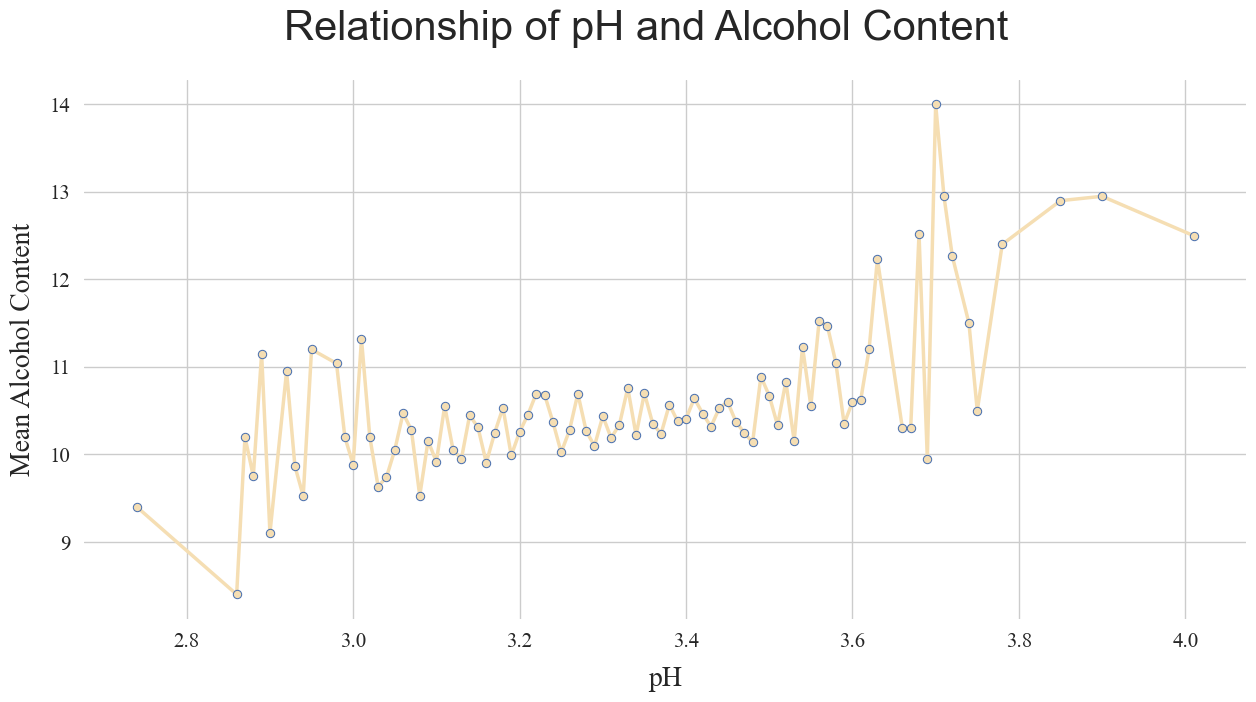

In [76]:
plt.rcParams.update(params)

fig, ax = plt.subplots(figsize=(15, 7))
sns.set(style="whitegrid")

ax = sns.lineplot(
    x="pH",
    y="alcohol",
    data=mean_fixedacidity,
    marker="o",
    markeredgecolor="b",
    color=color_15,
    linewidth=2.5,
    markers=True,
)


plt.xlabel("pH")
plt.ylabel("Mean Alcohol Content")
plt.xticks()
plt.yticks()

plt.suptitle("Relationship of pH and Alcohol Content")

plt.show()

### Section Summary
> * The pH level of the wines with the highest alcohol content is around 3.7.
> * Most of the wines with lower alcohol also have lower pH levels.

### Data Scaling

Here, I scaled the values the columns to help compare them on an equal footing.

In [65]:
columns = [
    "fixed acidity",
    "volatile acidity",
    "citric acid",
    "residual sugar",
    "chlorides",
    "free sulfur dioxide",
    "total sulfur dioxide",
    "density",
    "pH",
    "sulphates",
    "alcohol",
    "quality",
]

scaled_redwine_linear = scale_data(columns)

In [66]:
scaled_redwine_linear = scaled_redwine_linear.drop("quality", axis=1)

## Functions Used in This Section

In [67]:
def create_varialbles(data, indepdent_varialble, dependent_variable):
    """
    Assign independent and dependent variables.
    """

    X = data[indepdent_varialble]
    y = data[dependent_variable]

    return X, y

In [68]:
def linear_regression_model(X, y):
    """
    Creates the linear regression model.
    """

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, shuffle=True, test_size=0.2, random_state=0
    )
    log_model = LinearRegression()
    log_model.fit(X_train, y_train)
    y_predict = log_model.predict(X_test)

    return log_model, X_train, X_test, y_train, y_test, y_predict

In [69]:
def print_rsquared(y_test, y_predict):
    '''
    Prints the R-Squared value.
    '''
    
    print("R-Squared value is: ", np.round(r2_score(y_test, y_predict), 2))

## Linear Regression Citric Acid and Alcohol

Here, I attempted to determine how well citric acid values can determine the alcohol values.

In [70]:
data = scaled_redwine_linear

indepdent_varialble = [
    "citric acid",
]

dependent_variable = "alcohol"

X, y = create_varialbles(data, indepdent_varialble, dependent_variable)
log_model, X_train, X_test, y_train, y_test, y_predict = linear_regression_model(X, y)

## R-Squared

In [71]:
print_rsquared(y_test, y_predict)

R-Squared value is:  0.01


## Linear Regression Density and Alcohol

Here, I attempted to determine how well density values can determine the alcohol values.

In [72]:
data = scaled_redwine_linear

indepdent_varialble = [
    "density",
]

dependent_variable = "alcohol"

X, y = create_varialbles(data, indepdent_varialble, dependent_variable)
log_model, X_train, X_test, y_train, y_test, y_predict = linear_regression_model(X, y)

## R-Squared

In [73]:
print_rsquared(y_test, y_predict)

R-Squared value is:  0.26


## Linear Regression Fixed Acidity and Alcohol

Here, I attempted to determine how well fixed acidity values can determine the alcohol values.

In [74]:
data = scaled_redwine_linear

indepdent_varialble = [
    "fixed acidity",
]

dependent_variable = "alcohol"

X, y = create_varialbles(data, indepdent_varialble, dependent_variable)
log_model, X_train, X_test, y_train, y_test, y_predict = linear_regression_model(X, y)

## R-Squared

In [75]:
print_rsquared(y_test, y_predict)

R-Squared value is:  0.0


## Linear Regression Sulphates and Alcohol

Here, I attempted to determine how well sulphates values can determine the alcohol values.

In [76]:
data = scaled_redwine_linear

indepdent_varialble = [
    "sulphates",
]

dependent_variable = "alcohol"

X, y = create_varialbles(data, indepdent_varialble, dependent_variable)
log_model, X_train, X_test, y_train, y_test, y_predict = linear_regression_model(X, y)

## R-Squared

In [77]:
print_rsquared(y_test, y_predict)

R-Squared value is:  0.0


## Linear Regression Chlorides and Alcohol

Here, I attempted to determine how well chlorides values can determine the alcohol values.

In [78]:
data = scaled_redwine_linear

indepdent_varialble = [
    "chlorides",
]

dependent_variable = "alcohol"

X, y = create_varialbles(data, indepdent_varialble, dependent_variable)
log_model, X_train, X_test, y_train, y_test, y_predict = linear_regression_model(X, y)

## R-Squared

In [79]:
print_rsquared(y_test, y_predict)

R-Squared value is:  0.07


## Linear Regression Total Sulfur Dioxide and Alcohol

Here, I attempted to determine how well total sulfur dioxide values can determine the alcohol values.

In [80]:
data = scaled_redwine_linear

indepdent_varialble = [
    "total sulfur dioxide",
]

dependent_variable = "alcohol"

X, y = create_varialbles(data, indepdent_varialble, dependent_variable)
log_model, X_train, X_test, y_train, y_test, y_predict = linear_regression_model(X, y)

## R-Squared

In [81]:
print_rsquared(y_test, y_predict)

R-Squared value is:  0.03


## Linear Regression Free Sulfur Dioxide and Alcohol

Here, I attempted to determine how well free sulfur dioxide values can determine the alcohol values.

In [82]:
data = scaled_redwine_linear

indepdent_varialble = [
    "free sulfur dioxide",
]

dependent_variable = "alcohol"

X, y = create_varialbles(data, indepdent_varialble, dependent_variable)
log_model, X_train, X_test, y_train, y_test, y_predict = linear_regression_model(X, y)

## R-Squared

In [83]:
print_rsquared(y_test, y_predict)

R-Squared value is:  -0.01


## Linear Regression pH and Alcohol

Here, I attempted to determine how well pH values can determine the alcohol values.

In [84]:
data = scaled_redwine_linear

indepdent_varialble = [
    "pH",
]

dependent_variable = "alcohol"

X, y = create_varialbles(data, indepdent_varialble, dependent_variable)
log_model, X_train, X_test, y_train, y_test, y_predict = linear_regression_model(X, y)

## R-Squared

In [85]:
print_rsquared(y_test, y_predict)

R-Squared value is:  0.05


### Section Summary
> * Based on the R-Squared values from each linear regression model test above, we can see the following regarding the ability of each of the collinear features to determine alcohol values:
        1. citric acid: 0.01
        2. density: 0.26
        3. fixed acidity: 0.0
        4. chlorides: 0.07
        5. sulphates: 0.0
        6. total sulfur dioxide: 0.03
        7. free sulfur dioxide: -0.01
        9. pH: 0.05
> * It is clear that none of the features above can strongly predict the alcohol values.       

## Multivariant Linear Regression

Although none of the features I tested in the previous section was a strong predictor of alcohol values, in this section, I created a multivariant linear regression model using the better feature from the pair of collinear features. I also used two features with no collinear relationship: volatile acidity and residual sugar. 

In [86]:
data = scaled_redwine_linear

indepdent_varialble = [
    "density",
    "volatile acidity",
    "residual sugar",
    "total sulfur dioxide",
    "chlorides",
    "pH",
]

dependent_variable = "alcohol"

X, y = create_varialbles(data, indepdent_varialble, dependent_variable)
log_model, X_train, X_test, y_train, y_test, y_predict = linear_regression_model(X, y)

### R-Squared Value

In [87]:
print_rsquared(y_test, y_predict)

R-Squared value is:  0.44


### Adjusted R-Squared

In [88]:
adjusted_r2 = 1 - (1 - log_model.score(X, y)) * (len(y) - 1) / (len(y) - X.shape[1] - 1)
adjusted_r2 = np.round(adjusted_r2, 2)
print("Adjusted R-Squared value is", adjusted_r2)

Adjusted R-Squared value is 0.39


### Section Summary
> * For each collinear feature, I chose the one with the highest R-Squared values. Below are the features I used for the multivariant linear regression model:
        1. density
        4. chlorides
        4. total sulfur dioxide
        5. pH
        6. volatile acidity (not collinear with any other feature)
        7. residual sugar (not collinear with any other feature)
> *  Inserting the features above in the multivariant linear regression model, I received the following measures:
        1. R-Squared: 0.44
        2. Adjusted R-Squared: 0.39
> * We can be quite certain that no one feature by itself and also in combination can adequately predict the alcohol values in this dataset.       

# Conclusions

Here is a summary of the conclusions that can be drawn from this report. 

>* **This Analysis:** I reviewed nearly 1,600 data points of red Portuguese "Vinho Verde" wines.
>* **Multivariant Logistic Regression Model to Predict Quality:** The logistic regression model I tested in this report used 7 features. It predicted quality with an ADEQUATE accuracy score of 0.78. <br>
>* **Multivariant Decision Tree Model to Predict Quality:** The decision tree model I tested in this report used 7 features. It predicted quality with an ADEQUATE accuracy score of 0.79. <br>
>* **Multivariant Linear Regression Model to Predict Alcohol:** The linear regression model I tested in this report used 6 features. It predicted alcohol with an INADEQUATE R-Squared value of 0.44 and an INADEQUATE adjusted R-Squared value of 0.39. <br> 
>* **Overall Conclusion:** This analysis seems to indicate that it is possible to adequately predict the quality values from other data in this dataset but it is not possible to adequately predict the alcohol values from the data in this dataset. <br> 

# Suggestions for Improvement

This report has certain weaknesses. In this section, I outlined those weaknesses and some avenues for improvement. 

>* **Logistic Regression Model:** My model had an accuracy value of 0.78. The model could improve to achieve a higher accuracy value. I will continue to learn more about creating such models.<br>
>* **Decision Tree Model:** My model had an accuracy value of 0.79, almost identical to the logistic regression model. Similar to the logistic regression model, this model could improve to achieve a higher accuracy value and I will continue to learn more in this area as well.<br>
>* **Linear Regression Model:** Perhaps it is possible to create a better model to predict alcohol values. The results I obtained with my model were not impressive. <br>
>* **Pandas:** I will continue to learn to utilize more optimized Pandas techniques and algorithms.<br>
>* **SQL:** I will continue to increase my knowledge of SQL and become more skilled in this language.<br>
>* **Seaborn and Matplotlib:** I will continue to improve my knowledge of Seaborn and Matplotlib for creating visualizations. <br>
>* **Python Code:** I will continue to write better and more efficient Python code. <br>
>* **Clean Code:** I will continue to adhere to the principles of writing clean code. <br>
>* **Readability and Efficiency:** I will continue to improve my skills to find the delicate balance between readability and efficiency in coding.<br>